In [107]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 
sns.set()
%matplotlib inline

In [108]:
base_url = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/'
confirmed_cases_data_url = base_url + 'time_series_covid19_confirmed_global.csv'
death_cases_data_url = base_url + 'time_series_covid19_deaths_global.csv'
recovery_cases_data_url = base_url+ 'time_series_covid19_recovered_global.csv'
raw_data_confirmed = pd.read_csv(confirmed_cases_data_url)
raw_data_deaths = pd.read_csv(death_cases_data_url)
raw_data_recovered = pd.read_csv(recovery_cases_data_url)

In [109]:
raw_data_confirmed.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,8/29/21,8/30/21,8/31/21,9/1/21,9/2/21,9/3/21,9/4/21,9/5/21,9/6/21,9/7/21
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,152960,153148,153220,153260,153306,153375,153375,153375,153534,153626
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,144847,145333,146387,147369,148222,149117,150101,150997,151499,152239
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,195162,195574,196080,196527,196915,197308,197659,198004,198313,198645
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,15025,15032,15033,15046,15052,15055,15055,15055,15069,15070
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,47168,47331,47544,47781,48004,48261,48475,48656,48790,49114


In [110]:
raw_data_confirmed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 279 entries, 0 to 278
Columns: 599 entries, Province/State to 9/7/21
dtypes: float64(2), int64(595), object(2)
memory usage: 1.3+ MB


In [111]:
raw_data_confirmed.describe()

,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,...,8/29/21,8/30/21,8/31/21,9/1/21,9/2/21,9/3/21,9/4/21,9/5/21,9/6/21,9/7/21
count,277.000000,277.000000,279.000000,279.000000,279.000000,279.000000,279.000000,279.000000,279.000000,279.000000,...,2.790000e+02,2.790000e+02,2.790000e+02,2.790000e+02,2.790000e+02,2.790000e+02,2.790000e+02,2.790000e+02,2.790000e+02,2.790000e+02
mean,20.305266,22.500100,1.996416,2.347670,3.372760,5.136201,7.591398,10.491039,19.992832,22.103943,...,7.757488e+05,7.782074e+05,7.803165e+05,7.829078e+05,7.852558e+05,7.880632e+05,7.897804e+05,7.913097e+05,7.928718e+05,7.954584e+05
std,25.206138,75.408236,26.637656,26.735265,33.284971,46.326447,64.742529,87.231432,214.047295,215.362435,...,3.418813e+06,3.431195e+06,3.439622e+06,3.450818e+06,3.460032e+06,3.475112e+06,3.480149e+06,3.484045e+06,3.489057e+06,3.502151e+06
min,-51.796300,-178.116500,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,4.860416,-23.041800,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.644500e+03,1.675500e+03,1.676500e+03,1.678500e+03,1.771000e+03,1.779000e+03,1.789000e+03,1.834500e+03,1.864000e+03,1.911500e+03
50%,21.521757,20.939400,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,2.920900e+04,2.940000e+04,2.950100e+04,2.959900e+04,3.080700e+04,3.232300e+04,3.379200e+04,3.420400e+04,3.429700e+04,3.440800e+04
75%,40.463667,85.240100,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,3.407465e+05,3.423330e+05,3.439875e+05,3.457375e+05,3.474710e+05,3.490665e+05,3.499000e+05,3.503585e+05,3.506670e+05,3.509500e+05
max,71.706900,178.065000,444.000000,444.000000,549.000000,761.000000,1058.000000,1423.000000,3554.000000,3554.000000,...,3.879889e+07,3.905743e+07,3.919813e+07,3.939616e+07,3.954930e+07,3.985026e+07,3.990643e+07,3.994499e+07,4.001832e+07,4.028000e+07


In [112]:
raw_data_confirmed.tail()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,8/29/21,8/30/21,8/31/21,9/1/21,9/2/21,9/3/21,9/4/21,9/5/21,9/6/21,9/7/21
274,NaN,Vietnam,14.058324,108.277199,0,2,2,2,2,2,...,435265,449489,462096,473530,486727,501649,511170,524307,536788,550996
275,NaN,West Bank and Gaza,31.952200,35.233200,0,0,0,0,0,0,...,337405,339816,342282,344957,347730,350224,351809,353732,356474,359236
276,NaN,Yemen,15.552727,48.516388,0,0,0,0,0,0,...,7784,7829,7869,7900,7951,8018,8056,8108,8142,8181
277,NaN,Zambia,-13.133897,27.849332,0,0,0,0,0,0,...,206051,206145,206327,206522,206705,206884,207028,207114,207167,207294
278,NaN,Zimbabwe,-19.015438,29.154857,0,0,0,0,0,0,...,124437,124581,124773,124960,125118,125331,125425,125550,125671,125796


In [113]:
confirmed_country = raw_data_confirmed.groupby(["Country/Region"]).sum().drop(['Lat', 'Long'], axis=1)
confirmed_country.head()

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,8/29/21,8/30/21,8/31/21,9/1/21,9/2/21,9/3/21,9/4/21,9/5/21,9/6/21,9/7/21
Country/Region,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0,0,0,0,0,0,0,0,0,0,...,152960,153148,153220,153260,153306,153375,153375,153375,153534,153626
Albania,0,0,0,0,0,0,0,0,0,0,...,144847,145333,146387,147369,148222,149117,150101,150997,151499,152239
Algeria,0,0,0,0,0,0,0,0,0,0,...,195162,195574,196080,196527,196915,197308,197659,198004,198313,198645
Andorra,0,0,0,0,0,0,0,0,0,0,...,15025,15032,15033,15046,15052,15055,15055,15055,15069,15070
Angola,0,0,0,0,0,0,0,0,0,0,...,47168,47331,47544,47781,48004,48261,48475,48656,48790,49114


In [114]:
confirmed_country.index

Index(['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola',
       'Antigua and Barbuda', 'Argentina', 'Armenia', 'Australia', 'Austria',
       ...
       'United Kingdom', 'Uruguay', 'Uzbekistan', 'Vanuatu', 'Venezuela',
       'Vietnam', 'West Bank and Gaza', 'Yemen', 'Zambia', 'Zimbabwe'],
      dtype='object', name='Country/Region', length=195)

In [115]:
confirmed_country = confirmed_country.transpose()
confirmed_country.head()

Country/Region,Afghanistan,Albania,Algeria,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,Australia,Austria,...,United Kingdom,Uruguay,Uzbekistan,Vanuatu,Venezuela,Vietnam,West Bank and Gaza,Yemen,Zambia,Zimbabwe
1/22/20,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1/23/20,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,2,0,0,0,0
1/24/20,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,2,0,0,0,0
1/25/20,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,2,0,0,0,0
1/26/20,0,0,0,0,0,0,0,0,4,0,...,0,0,0,0,0,2,0,0,0,0


In [116]:
datetime_index = pd.DatetimeIndex(confirmed_country.index)
confirmed_country.set_index(datetime_index, inplace=True)
confirmed_country.index

DatetimeIndex(['2020-01-22', '2020-01-23', '2020-01-24', '2020-01-25',
               '2020-01-26', '2020-01-27', '2020-01-28', '2020-01-29',
               '2020-01-30', '2020-01-31',
               ...
               '2021-08-29', '2021-08-30', '2021-08-31', '2021-09-01',
               '2021-09-02', '2021-09-03', '2021-09-04', '2021-09-05',
               '2021-09-06', '2021-09-07'],
              dtype='datetime64[ns]', length=595, freq=None)

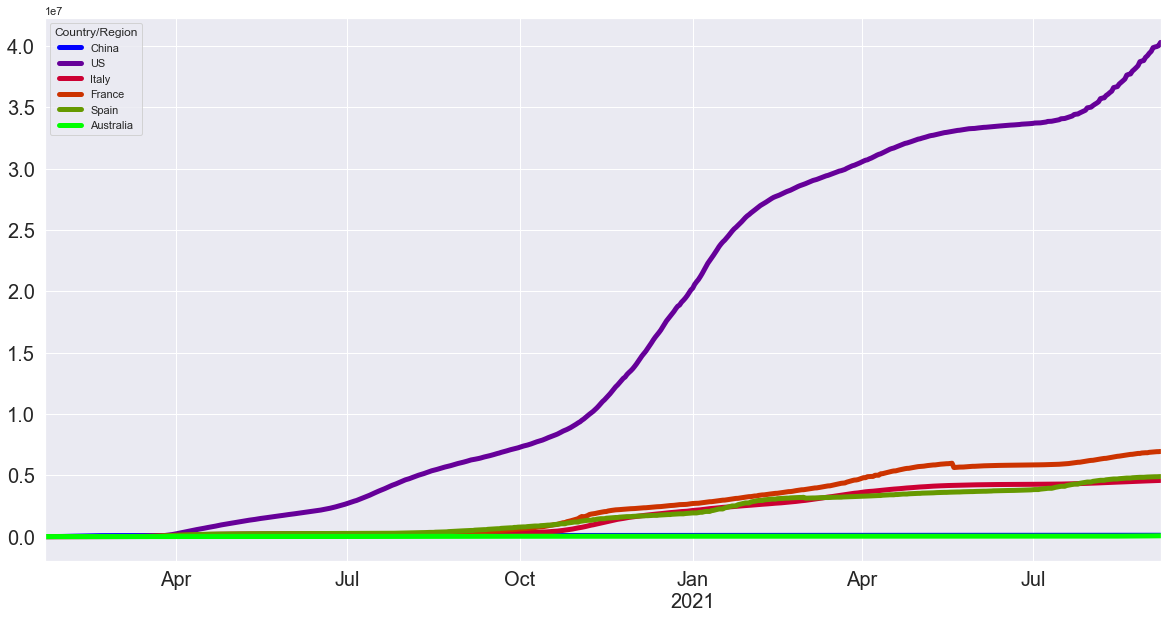

In [117]:
poi = ['China', 'US', 'Italy', 'France', 'Spain', 'Australia']
confirmed_country[poi].plot(figsize=(20,10), linewidth=5, colormap='brg', fontsize=20);

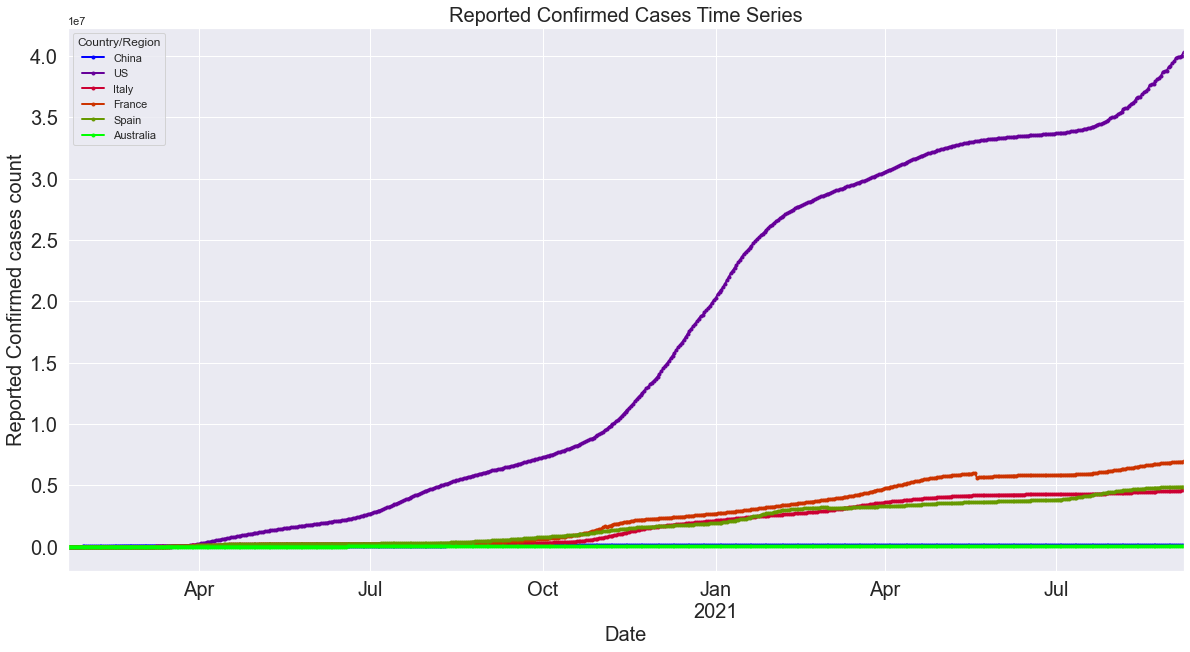

In [118]:

confirmed_country[poi].plot(figsize=(20,10), linewidth=2, marker='.', colormap='brg', fontsize=20)
plt.xlabel('Date', fontsize=20);
plt.ylabel('Reported Confirmed cases count', fontsize=20);
plt.title('Reported Confirmed Cases Time Series', fontsize=20);

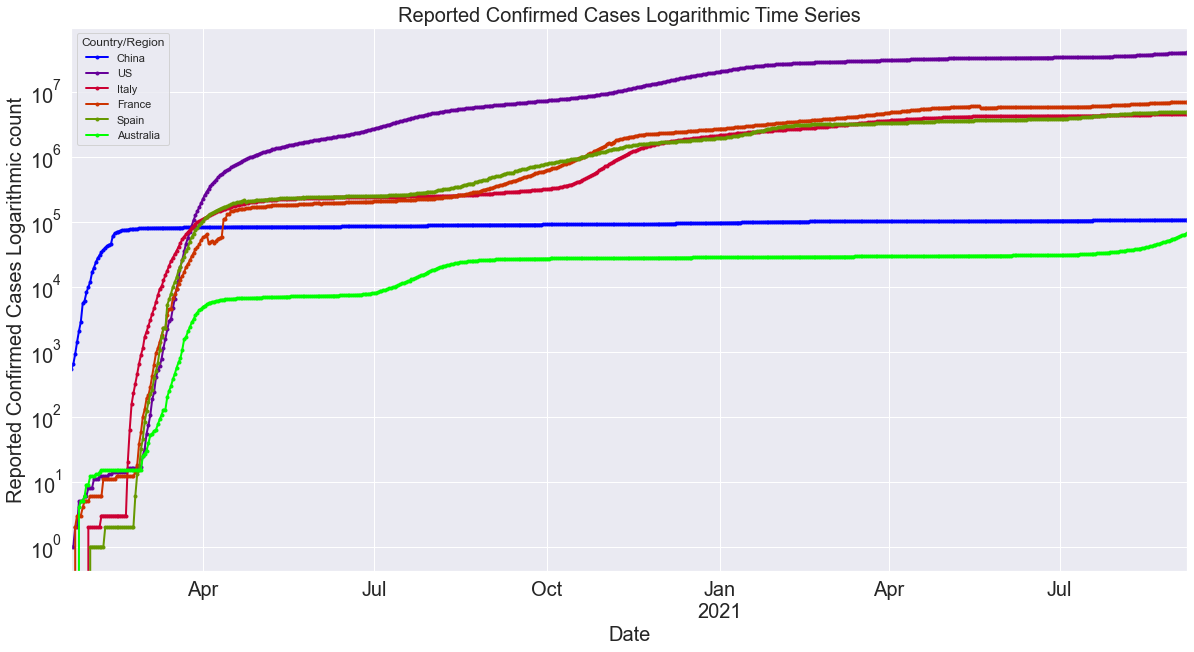

In [119]:
confirmed_country[poi].plot(figsize=(20,10), linewidth=2, marker='.', colormap='brg', fontsize=20, logy=True)
plt.xlabel('Date', fontsize=20);
plt.ylabel('Reported Confirmed Cases Logarithmic count', fontsize=20);
plt.title('Reported Confirmed Cases Logarithmic Time Series', fontsize=20);

In [120]:
raw_data_deaths.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,8/29/21,8/30/21,8/31/21,9/1/21,9/2/21,9/3/21,9/4/21,9/5/21,9/6/21,9/7/21
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,7101,7116,7118,7123,7127,7127,7127,7127,7141,7144
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,2492,2495,2498,2501,2505,2508,2512,2515,2519,2523
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,5209,5240,5269,5302,5339,5373,5399,5420,5445,5471
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,130,130,130,130,130,130,130,130,130,130
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,1201,1210,1217,1227,1235,1248,1258,1270,1282,1299


In [121]:
raw_data_deaths.info

<bound method DataFrame.info of     Province/State      Country/Region        Lat        Long  1/22/20  \
0              NaN         Afghanistan  33.939110   67.709953        0   
1              NaN             Albania  41.153300   20.168300        0   
2              NaN             Algeria  28.033900    1.659600        0   
3              NaN             Andorra  42.506300    1.521800        0   
4              NaN              Angola -11.202700   17.873900        0   
..             ...                 ...        ...         ...      ...   
274            NaN             Vietnam  14.058324  108.277199        0   
275            NaN  West Bank and Gaza  31.952200   35.233200        0   
276            NaN               Yemen  15.552727   48.516388        0   
277            NaN              Zambia -13.133897   27.849332        0   
278            NaN            Zimbabwe -19.015438   29.154857        0   

     1/23/20  1/24/20  1/25/20  1/26/20  1/27/20  ...  8/29/21  8/30/21  \
0   

In [122]:
deaths_country = raw_data_deaths.groupby(['Country/Region']).sum().drop(['Lat', 'Long'], axis=1)
deaths_country = deaths_country.transpose()
datetime_index = pd.DatetimeIndex(deaths_country.index)
deaths_country.set_index(datetime_index, inplace=True)
deaths_country.head()

Country/Region,Afghanistan,Albania,Algeria,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,Australia,Austria,...,United Kingdom,Uruguay,Uzbekistan,Vanuatu,Venezuela,Vietnam,West Bank and Gaza,Yemen,Zambia,Zimbabwe
2020-01-22,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2020-01-23,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2020-01-24,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2020-01-25,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2020-01-26,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [123]:
deaths_country.index

DatetimeIndex(['2020-01-22', '2020-01-23', '2020-01-24', '2020-01-25',
               '2020-01-26', '2020-01-27', '2020-01-28', '2020-01-29',
               '2020-01-30', '2020-01-31',
               ...
               '2021-08-29', '2021-08-30', '2021-08-31', '2021-09-01',
               '2021-09-02', '2021-09-03', '2021-09-04', '2021-09-05',
               '2021-09-06', '2021-09-07'],
              dtype='datetime64[ns]', length=595, freq=None)

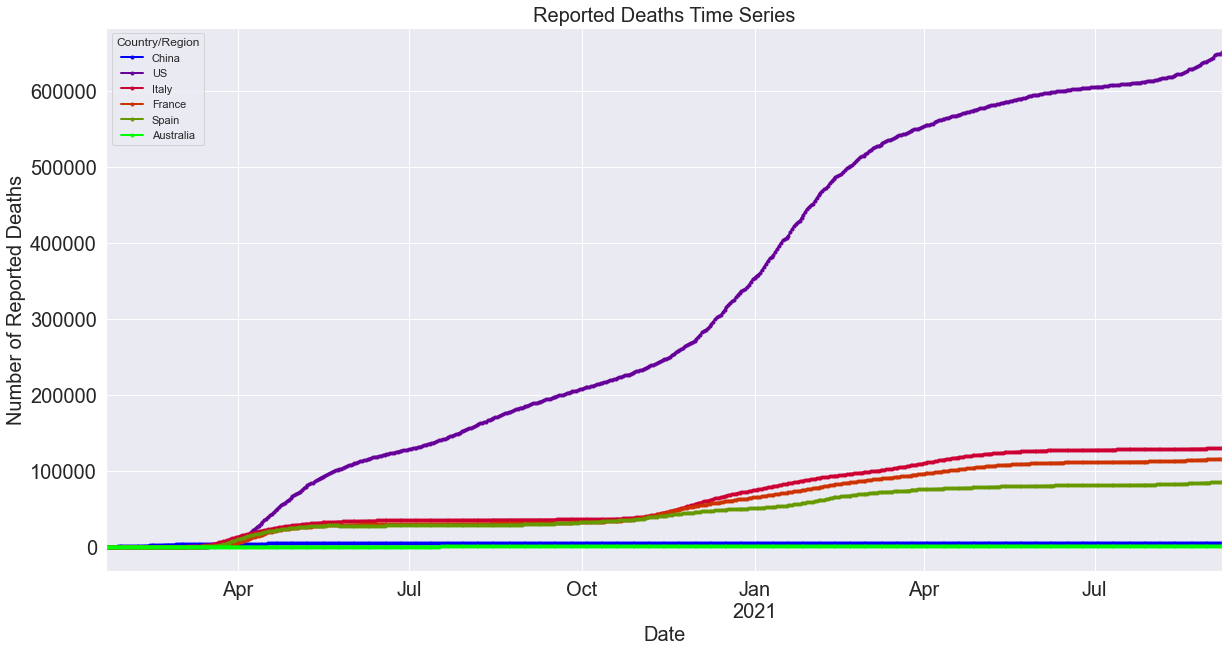

In [124]:
deaths_country[poi].plot(figsize=(20,10), linewidth=2, marker='.', colormap='brg', fontsize=20)
plt.xlabel('Date', fontsize=20);
plt.ylabel('Number of Reported Deaths', fontsize=20);
plt.title('Reported Deaths Time Series', fontsize=20);

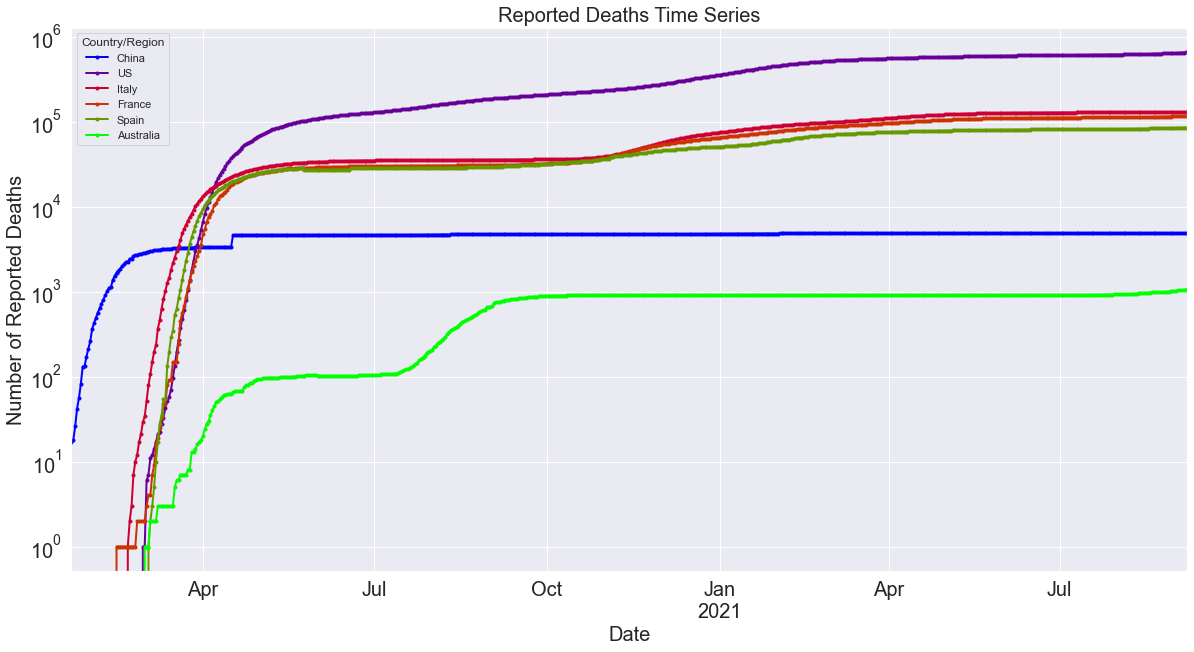

In [125]:
deaths_country[poi].plot(figsize=(20,10), linewidth=2, marker='.', fontsize=20, colormap='brg', logy=True)
plt.xlabel('Date', fontsize=20);
plt.ylabel('Number of Reported Deaths', fontsize=20);
plt.title('Reported Deaths Time Series', fontsize=20);

In [126]:
for col in deaths_country.columns:
    deaths_country.loc[(deaths_country[col] < 25),col] = None
deaths_country.tail()

Country/Region,Afghanistan,Albania,Algeria,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,Australia,Austria,...,United Kingdom,Uruguay,Uzbekistan,Vanuatu,Venezuela,Vietnam,West Bank and Gaza,Yemen,Zambia,Zimbabwe
2021-09-03,7127.0,2508.0,5373.0,130.0,1248.0,44.0,112356.0,4892.0,1036.0,10785.0,...,133365.0,6034.0,1099.0,NaN,4056.0,12446.0,3706.0,1513.0,3611.0,4457.0
2021-09-04,7127.0,2512.0,5399.0,130.0,1258.0,46.0,112444.0,4904.0,1039.0,10790.0,...,133485.0,6034.0,1106.0,NaN,4072.0,12793.0,3720.0,1519.0,3614.0,4466.0
2021-09-05,7127.0,2515.0,5420.0,130.0,1270.0,46.0,112511.0,4911.0,1044.0,10793.0,...,133553.0,6034.0,1112.0,NaN,4086.0,13074.0,3727.0,1523.0,3616.0,4482.0
2021-09-06,7141.0,2519.0,5445.0,130.0,1282.0,46.0,112673.0,4924.0,1052.0,10801.0,...,133598.0,6034.0,1120.0,NaN,4098.0,13385.0,3744.0,1530.0,3617.0,4493.0
2021-09-07,7144.0,2523.0,5471.0,130.0,1299.0,47.0,112851.0,4939.0,1060.0,10812.0,...,133808.0,6037.0,1125.0,NaN,4133.0,13701.0,3755.0,1534.0,3620.0,4503.0


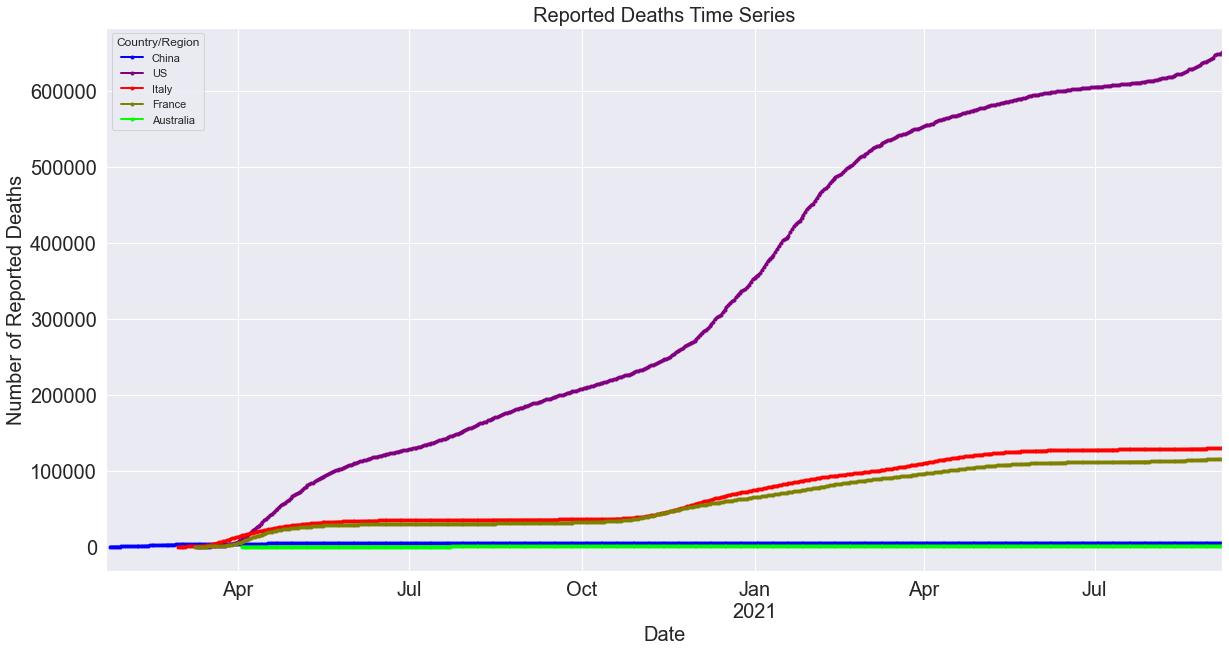

In [127]:
poi = ['China', 'US', 'Italy', 'France', 'Australia']
deaths_country[poi].plot(figsize=(20,10), linewidth=2, marker='.', colormap='brg', fontsize=20)
plt.xlabel('Date', fontsize=20);
plt.ylabel('Number of Reported Deaths', fontsize=20);
plt.title('Reported Deaths Time Series', fontsize=20);

In [128]:
deaths_country.dropna(axis=1,how="all")
deaths_country.info

<bound method DataFrame.info of Country/Region  Afghanistan  Albania  Algeria  Andorra  Angola  \
2020-01-22              NaN      NaN      NaN      NaN     NaN   
2020-01-23              NaN      NaN      NaN      NaN     NaN   
2020-01-24              NaN      NaN      NaN      NaN     NaN   
2020-01-25              NaN      NaN      NaN      NaN     NaN   
2020-01-26              NaN      NaN      NaN      NaN     NaN   
...                     ...      ...      ...      ...     ...   
2021-09-03           7127.0   2508.0   5373.0    130.0  1248.0   
2021-09-04           7127.0   2512.0   5399.0    130.0  1258.0   
2021-09-05           7127.0   2515.0   5420.0    130.0  1270.0   
2021-09-06           7141.0   2519.0   5445.0    130.0  1282.0   
2021-09-07           7144.0   2523.0   5471.0    130.0  1299.0   

Country/Region  Antigua and Barbuda  Argentina  Armenia  Australia  Austria  \
2020-01-22                      NaN        NaN      NaN        NaN      NaN   
2020-01-23       

In [129]:
deaths_country_drop = deaths_country.reset_index().drop(['index'], axis=1)
deaths_country_drop.head()

Country/Region,Afghanistan,Albania,Algeria,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,Australia,Austria,...,United Kingdom,Uruguay,Uzbekistan,Vanuatu,Venezuela,Vietnam,West Bank and Gaza,Yemen,Zambia,Zimbabwe
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [130]:
deaths_country_drop.head()

Country/Region,Afghanistan,Albania,Algeria,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,Australia,Austria,...,United Kingdom,Uruguay,Uzbekistan,Vanuatu,Venezuela,Vietnam,West Bank and Gaza,Yemen,Zambia,Zimbabwe
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


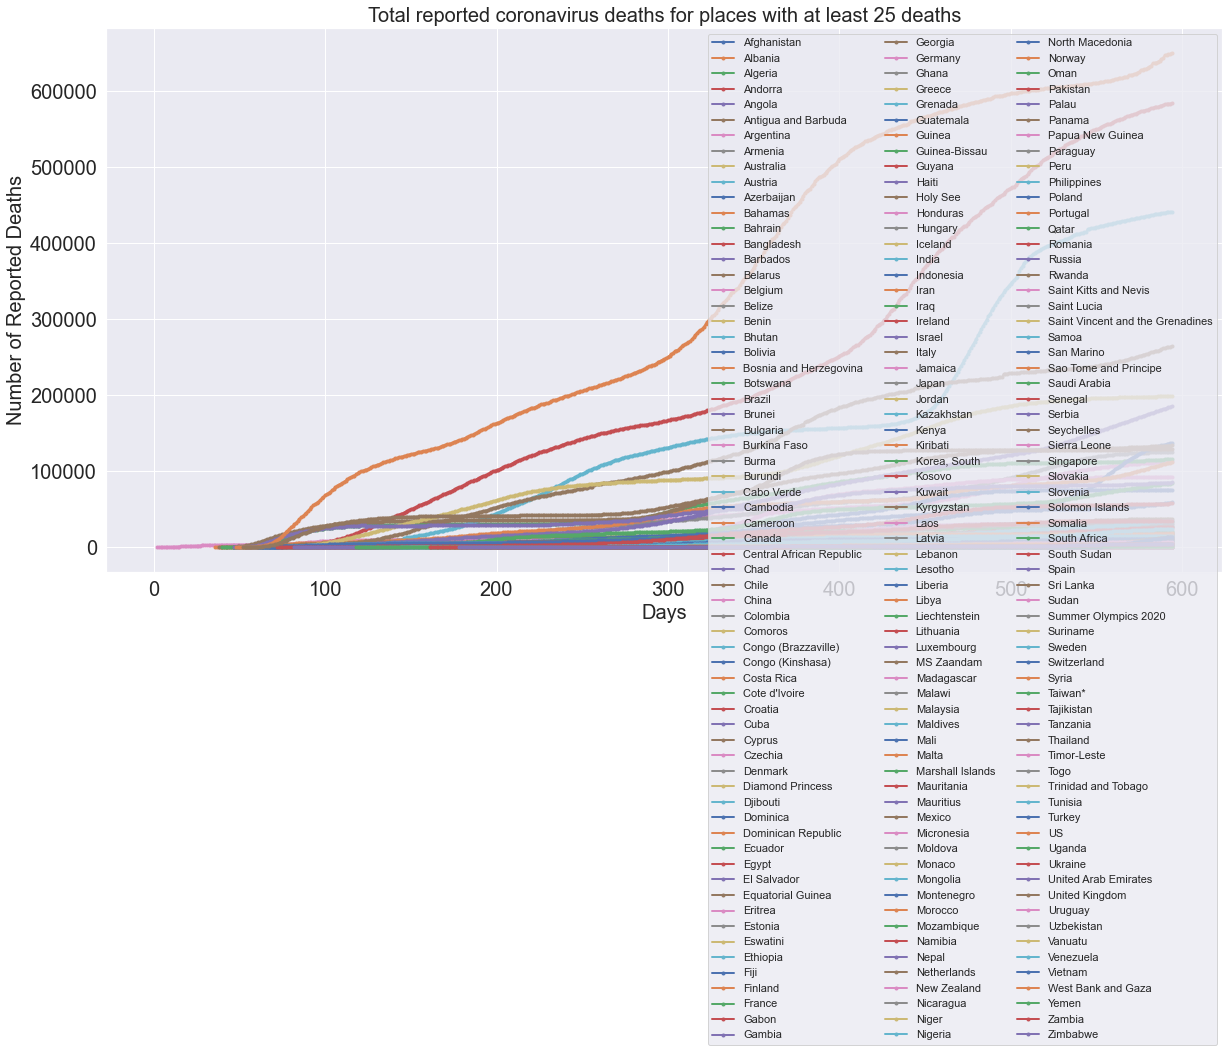

In [131]:
ax = deaths_country_drop.plot(figsize=(20,10), linewidth=2, marker='.', fontsize=20)
ax.legend(ncol=3, loc='upper right')
plt.xlabel('Days', fontsize=20);
plt.ylabel('Number of Reported Deaths', fontsize=20);
plt.title('Total reported coronavirus deaths for places with at least 25 deaths', fontsize=20);

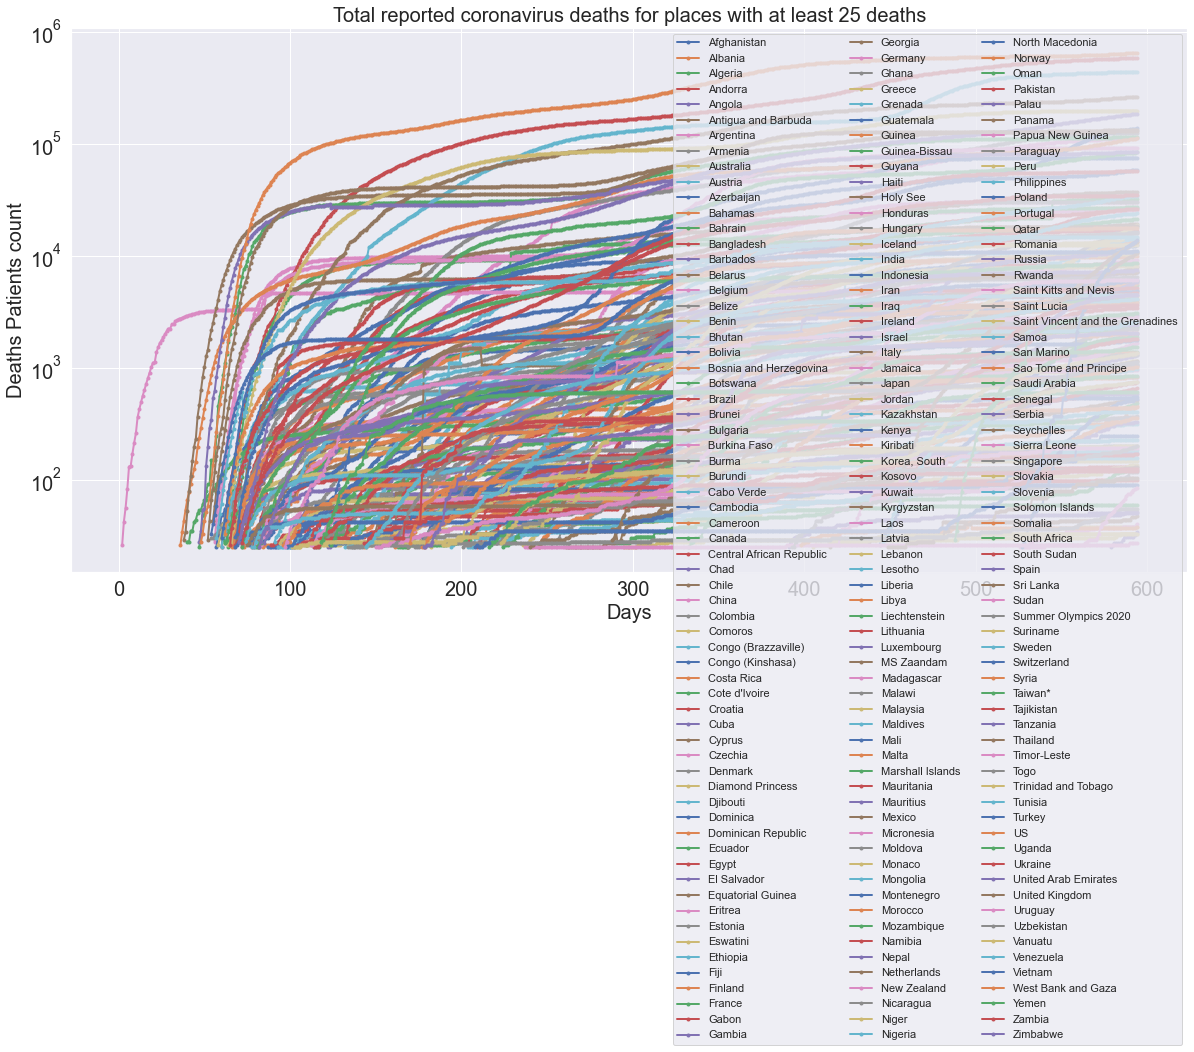

In [132]:
ax = deaths_country_drop.plot(figsize=(20,10), linewidth=2, marker='.', fontsize=20, logy=True)
ax.legend(ncol=3, loc='upper right')
plt.xlabel('Days', fontsize=20);
plt.ylabel('Deaths Patients count', fontsize=20);
plt.title('Total reported coronavirus deaths for places with at least 25 deaths', fontsize=20);

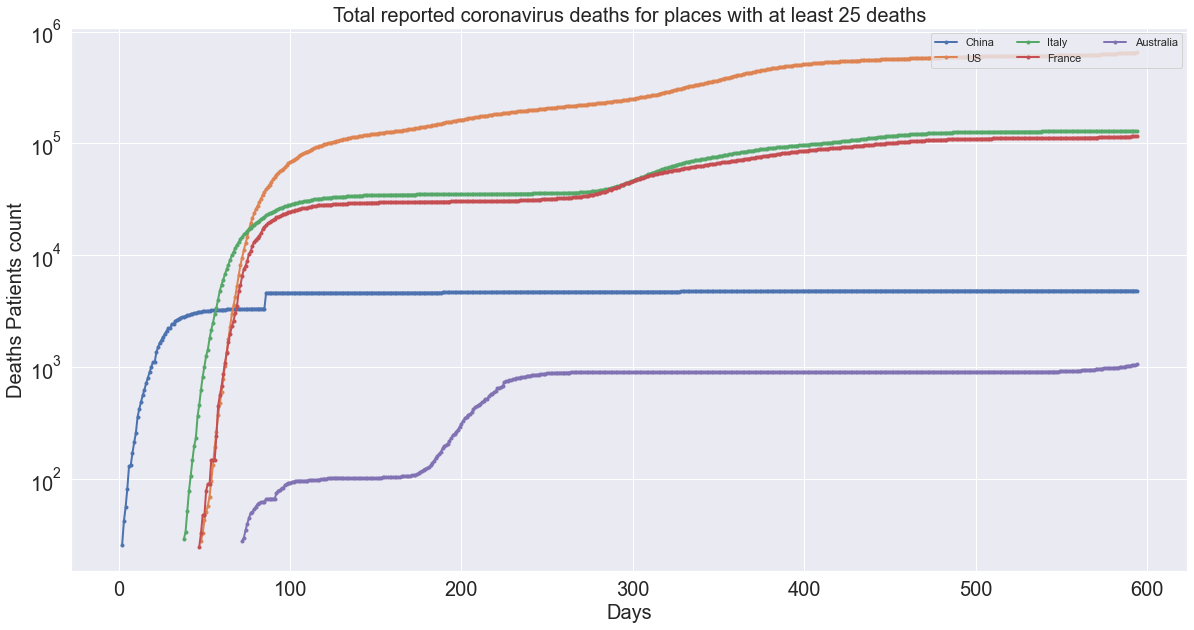

In [133]:
ax = deaths_country_drop[poi].plot(figsize=(20,10), linewidth=2, marker='.', fontsize=20, logy=True)
ax.legend(ncol=3, loc='upper right')
plt.xlabel('Days', fontsize=20);
plt.ylabel('Deaths Patients count', fontsize=20);
plt.title('Total reported coronavirus deaths for places with at least 25 deaths', fontsize=20);

In [134]:
def group_by_country(raw_data):
    """Returns data for countries indexed by date"""
    # Group by
    data = raw_data.groupby(['Country/Region']).sum().drop(['Lat', 'Long'], axis=1)
    # Transpose
    data = data.transpose()
    # Set index as DateTimeIndex
    datetime_index = pd.DatetimeIndex(data.index)
    data.set_index(datetime_index, inplace=True)
    return data

In [135]:
# Function to plot time series
def plot_time_series(df, plot_title, x_label, y_label, logy=False):
    """Plot time series and make looks a bit nice"""
    ax = df.plot(figsize=(20,10), linewidth=2, marker='.', fontsize=20, logy=logy)
    ax.legend(ncol=3, loc='lower right')
    plt.xlabel(x_label, fontsize=20);
    plt.ylabel(y_label, fontsize=20);
    plt.title(plot_title, fontsize=20);

In [136]:
recovered_country = group_by_country(raw_data_recovered)
recovered_country.tail()

Country/Region,Afghanistan,Albania,Algeria,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,Australia,Austria,...,United Kingdom,Uruguay,Uzbekistan,Vanuatu,Venezuela,Vietnam,West Bank and Gaza,Yemen,Zambia,Zimbabwe
2021-09-03,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2021-09-04,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2021-09-05,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2021-09-06,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2021-09-07,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [141]:
deaths_country_drop.head()

Country/Region,Afghanistan,Albania,Algeria,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,Australia,Austria,...,United Kingdom,Uruguay,Uzbekistan,Vanuatu,Venezuela,Vietnam,West Bank and Gaza,Yemen,Zambia,Zimbabwe
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [142]:
deaths_long = deaths_country_drop.reset_index().melt(id_vars='index', value_name='Deaths').rename(columns={'index':'Day'})
deaths_long.head()

,Day,Country/Region,Deaths
0,0,Afghanistan,NaN
1,1,Afghanistan,NaN
2,2,Afghanistan,NaN
3,3,Afghanistan,NaN
4,4,Afghanistan,NaN
